In [ ]:
import pandas as pd
df=pd.read_csv('merged_df.csv')
df_1=df.dropna()



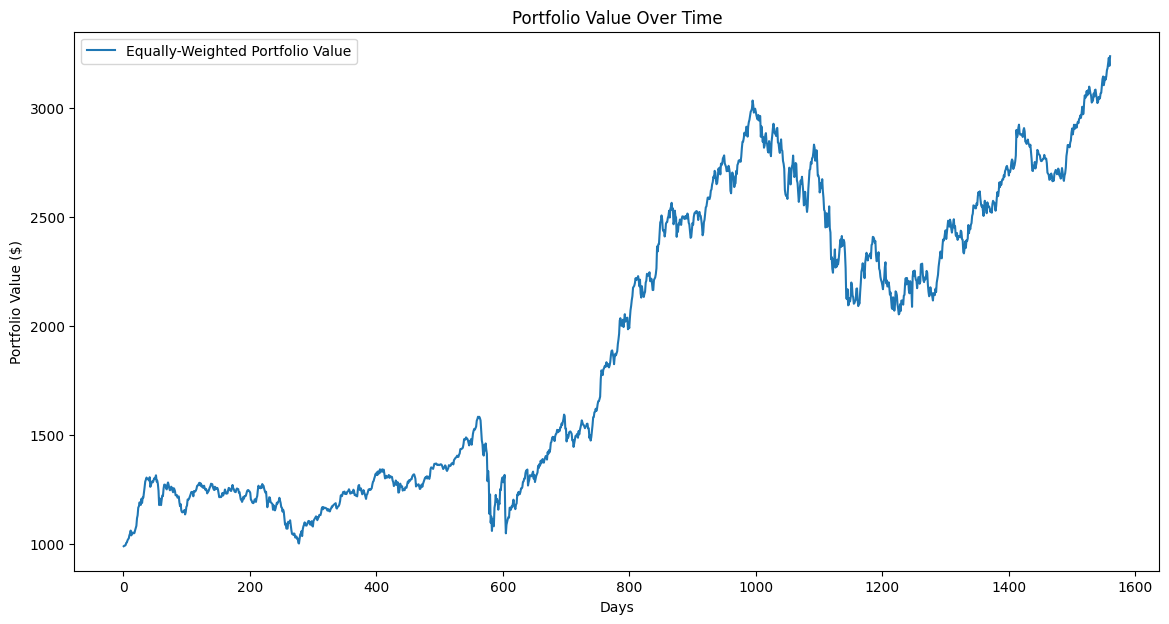

(3239.341514642486,
 AAPL: Close      -0.000192
 META: Close       0.001144
 V: Close          0.000254
 MC.PA: Close      0.000090
 NFLX: Close       0.001790
 NKE: Close        0.000507
 JPM: Close        0.000406
 BAC: Close        0.000464
 C: Close          0.000925
 NVDA: Close       0.000983
 LLY: Close        0.000772
 TSLA: Close       0.001019
 ^SPX: Close       0.000383
 ^DJI: Close       0.000158
 ^RUT: Close       0.000976
 IAU: Close       -0.000032
 CPER: Close      -0.000069
 GSG: Close       -0.000436
 CL=F: Close      -0.000632
 TLT: Close        0.000204
 JNK: Close        0.000166
 LQD: Close        0.000187
 BTC-USD: Close    0.001676
 ETH-USD: Close    0.002055
 XRP-USD: Close    0.001034
 Name: 1560, dtype: float64)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Filter columns for 'Close' prices only
close_prices = df.filter(regex='Close$')

# Calculate daily returns
daily_returns = close_prices.pct_change().dropna()

# Display the first few rows of daily returns to ensure correct calculation
daily_returns.head()


# Calculate the equally-weighted portfolio's daily return
weights = np.array([1/len(daily_returns.columns)] * len(daily_returns.columns))
portfolio_daily_returns = daily_returns.dot(weights)

# Calculate the cumulative return
initial_investment = 1000
portfolio_cumulative_returns = (1 + portfolio_daily_returns).cumprod() * initial_investment

# Calculate the final value of the portfolio
final_portfolio_value = portfolio_cumulative_returns.iloc[-1]

# Calculate the total return and proportion of return per stock by the end of the period
total_return = portfolio_cumulative_returns.pct_change().dropna()
final_returns_proportion = daily_returns.iloc[-1] * weights

# Plotting the portfolio's value over time
plt.figure(figsize=(14, 7))
plt.plot(portfolio_cumulative_returns, label='Equally-Weighted Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Days')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.show()

# Display the final portfolio value and total return
final_portfolio_value, final_returns_proportion


#Line Graph - Portfolio Value Over Time
In this line graph, we are visualizing the growth of a hypothetical $1,000 investment in an equally-weighted portfolio over time. Here's the breakdown:

Data Preparation: We start by selecting only the closing prices of stocks from our dataset and calculating the daily returns for each stock.

Portfolio Returns Calculation: We then compute the daily return of the equally-weighted portfolio. This is done by multiplying the daily returns of each stock by an equal weight (since it's an equally-weighted portfolio) and summing these up.

Cumulative Return: The daily portfolio returns are then compounded over time to calculate the cumulative return. This shows the growth of the portfolio from the initial $1,000 investment.

Final Portfolio Value: By the end of the period, we can see the final value that the portfolio would have reached based on the compounded returns. In this case, the portfolio value increased significantly over the timeframe displayed, showing an upward trend, with fluctuations that represent the volatility in the market.

Visualization: The line graph provides a clear visual representation of the portfolio's performance over time. Each point on the line represents the portfolio's value on a given day.

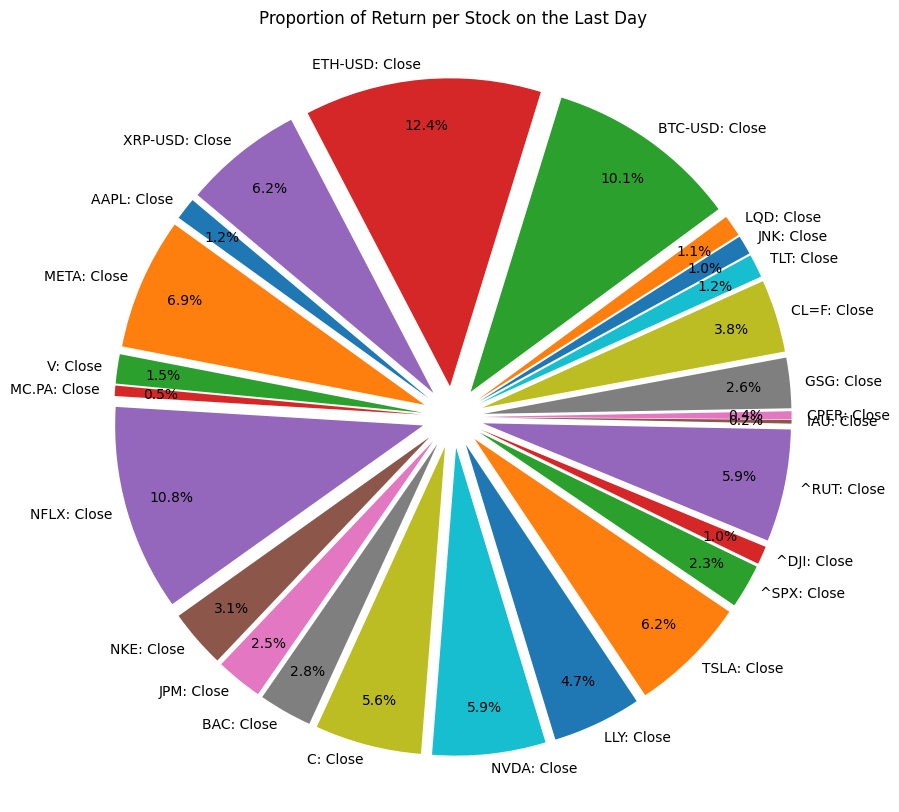

In [ ]:

final_returns_proportion_abs = final_returns_proportion.abs()
explode1 = [0.1 if contribution < threshold else 0 for contribution in final_returns_proportion_abs]

# Plotting the pie chart
plt.figure(figsize=(10, 10))
plt.pie(final_returns_proportion_abs, labels=final_returns_proportion_abs.index, autopct='%1.1f%%', explode= explode1, startangle=140, pctdistance=0.85, labeldistance=1.05)
plt.title('Proportion of Return per Stock on the Last Day')
plt.show()


#Pie Chart - Proportion of Return per Stock on the Last Day
For the pie chart, we are visualizing the contribution of each stock to the portfolio's return on the last day of the period. Here's how it was created:

Final Day Returns: We take the returns of each stock on the final day and apply the equal weight to them to reflect their contribution to the portfolio's return.

Absolute Values: We use the absolute values of these weighted returns to represent the magnitude of each stock's contribution, disregarding whether the individual return was positive or negative.

Pie Chart Creation: The pie chart is then constructed to show these contributions as proportions of the whole. Each 'slice' of the pie corresponds to a stock, with the size of the slice representing the stock's absolute contribution to the portfolio's return on the last day.

Visualization: This visualization helps to quickly identify which stocks had the largest impact on the portfolio's performance for the final day. It's particularly useful for assessing which assets drove the performance and may warrant further analysis or rebalancing.

Together, these visualizations provide a comprehensive view of the portfolio's performance over time and the impact of individual stocks on the portfolio's return on a specific day. This information is crucial for investors when making decisions about whether to hold, buy more, or sell specific stocks within their portfolio.